# Wine dataset (Regression Task)

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint

In [2]:
data = load_wine().data
target = load_wine().target

f_names = load_wine().feature_names
f_targets = load_wine().target_names

In [8]:
df = pd.DataFrame(data, columns=f_names)


## Understand Data
1. Describe Data

In [10]:
df.shape

(178, 13)

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


2. EDA - Descriptive

In [ ]:
# chekc null
df.isna().sum().sum()

0

In [ ]:
# check duplicate
df.duplicated().sum()

0

3. EDA - Viz

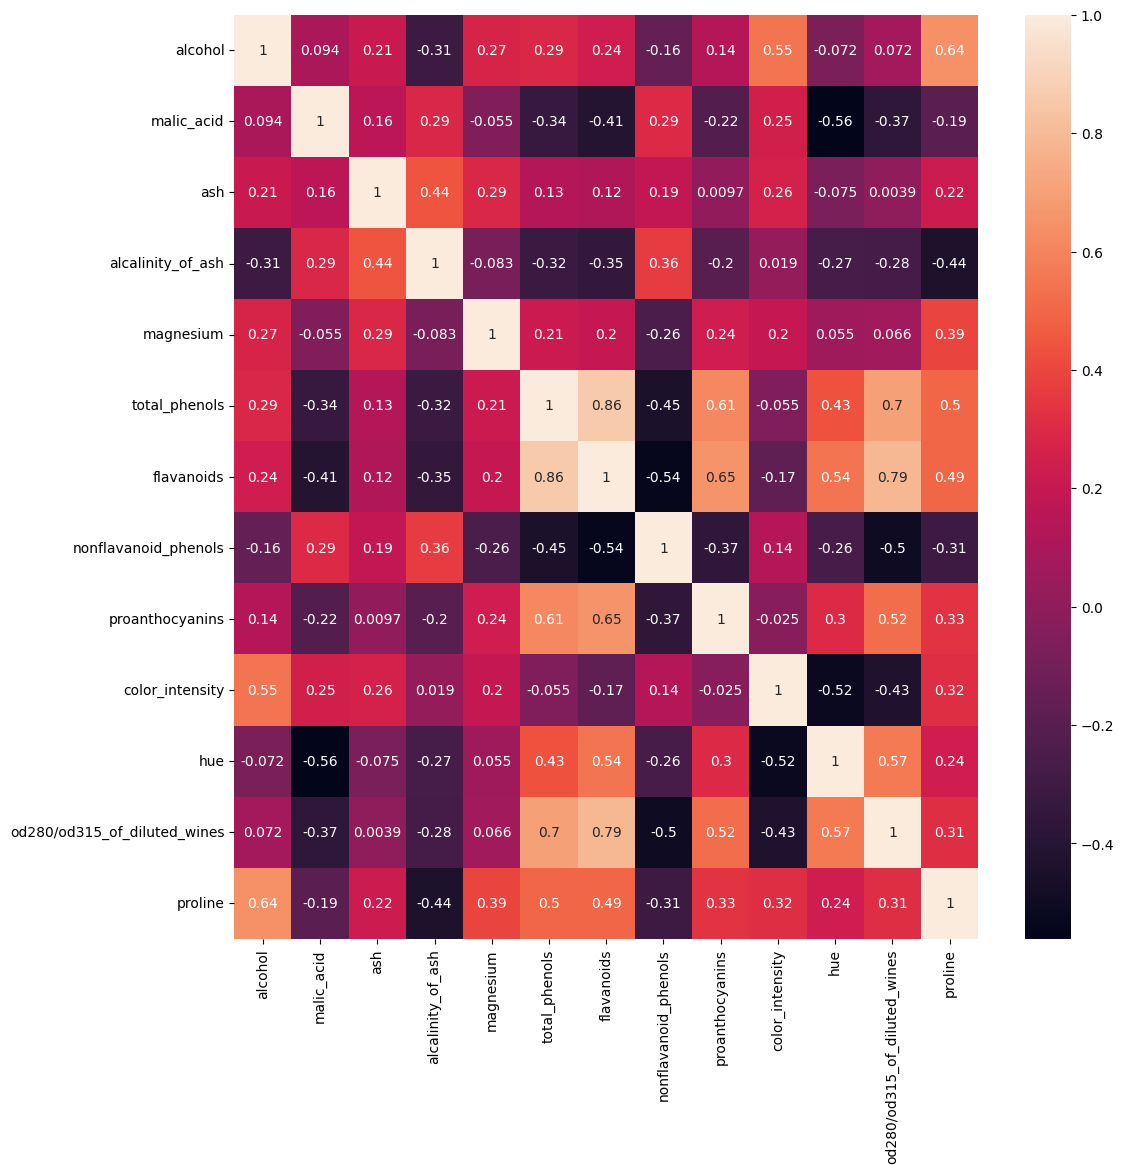

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

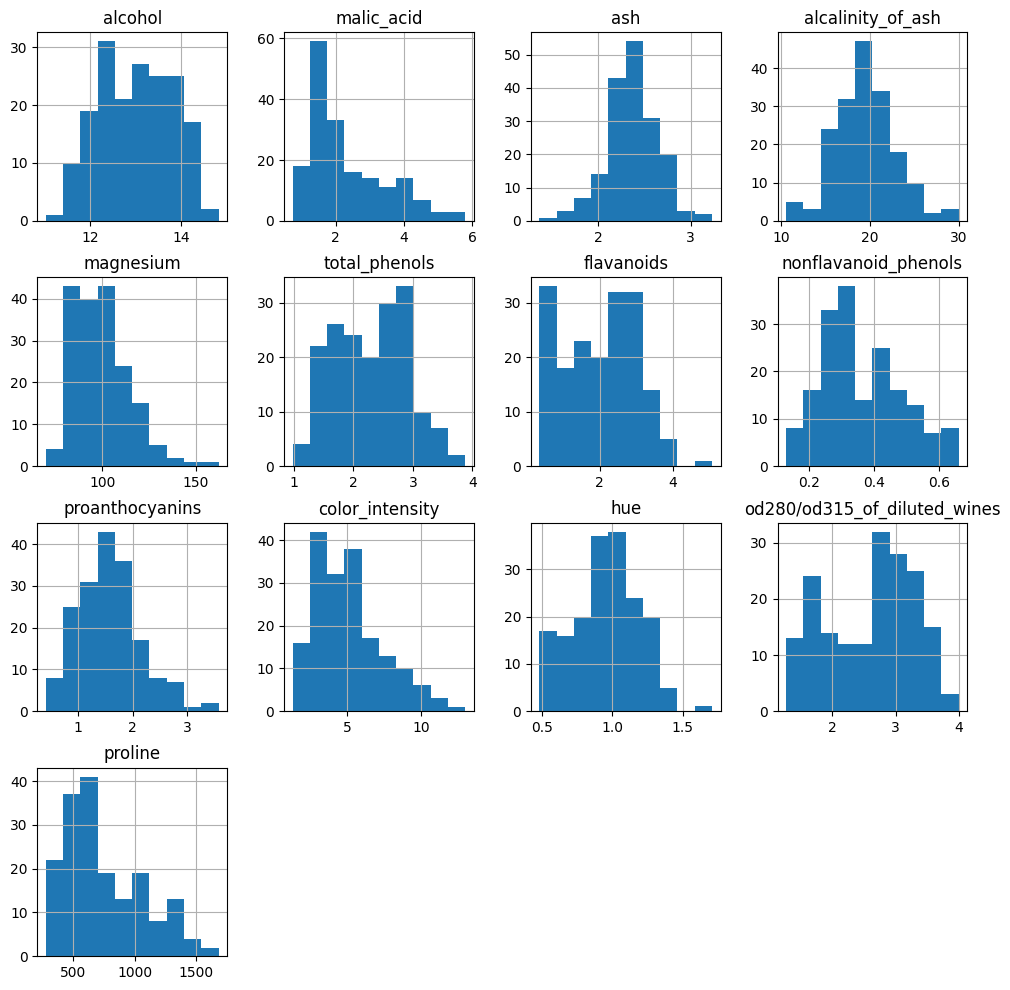

In [ ]:
df.hist(figsize=(12,12))
plt.show()

## Preprocessing

In [15]:
# categorical to numerical --> not valid for this dataset
# train_test split
y = df['magnesium']
X = df.drop(['magnesium'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42,
                                                    )




In [ ]:
# scale the features
mms = MinMaxScaler()
mms.fit(X_train) # learn min and max from train set for each column
X_train = mms.transform(X_train)
X_test = mms.transform(X_test) # ?

## train the model

In [19]:
# train the model
r2_scores = []
for i in range(2,20):
    knn_reg = KNeighborsRegressor(n_neighbors=i, metric="euclidean")
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f'n_neighbors: {i}, r2: {r2}')


n_neighbors: 2, r2: -0.005646575910301932
n_neighbors: 3, r2: 0.06239542207775817
n_neighbors: 4, r2: -0.0566022475090866
n_neighbors: 5, r2: -0.03082595706175839
n_neighbors: 6, r2: 0.02190386161086655
n_neighbors: 7, r2: -0.019737378974863606
n_neighbors: 8, r2: 0.020235038090375412
n_neighbors: 9, r2: 0.06987251533528671
n_neighbors: 10, r2: 0.03496509435392969
n_neighbors: 11, r2: 0.08340703303407959
n_neighbors: 12, r2: 0.06511381616528245
n_neighbors: 13, r2: 0.09065985877772254
n_neighbors: 14, r2: 0.056476075686999305
n_neighbors: 15, r2: 0.016803037119791142
n_neighbors: 16, r2: -0.0003491196497809046
n_neighbors: 17, r2: -0.011570833923171042
n_neighbors: 18, r2: 0.01003667213181969
n_neighbors: 19, r2: 0.043093018003992456


In [23]:
if len(r2_scores) > 0:
    best_n_neighbors = 2 + np.argmax(r2_scores)
    print(f'بهترین n_neighbors بر اساس r2 score: {best_n_neighbors}')
else:
    print('لیست r2_scores خالی است و نمی‌توان n_neighbors بهینه را محاسبه کرد.')

بهترین n_neighbors بر اساس r2 score: 13


In [24]:
# prediction
knn_reg = KNeighborsRegressor(n_neighbors=best_n_neighbors, metric="euclidean")
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

In [25]:
# evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R2: 0.09065985877772254
MSE: 138.7999671268902
MAE: 9.626068376068375


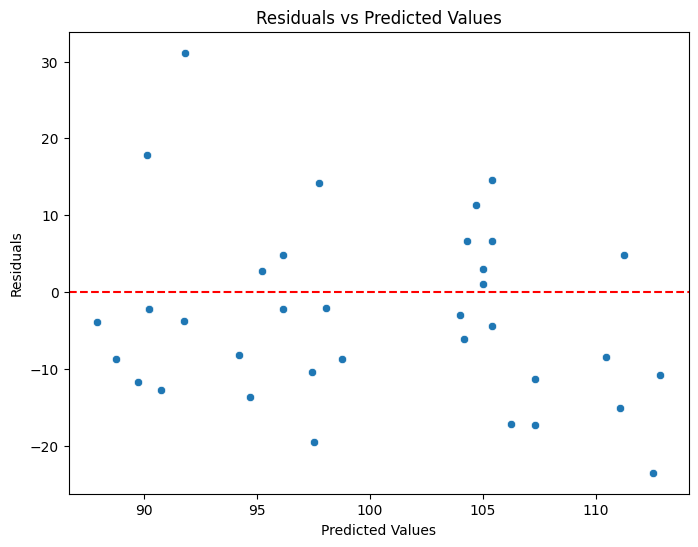

In [28]:
# بصری‌سازی مقدار خطایی که مدل در پیش بینی داشته است
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

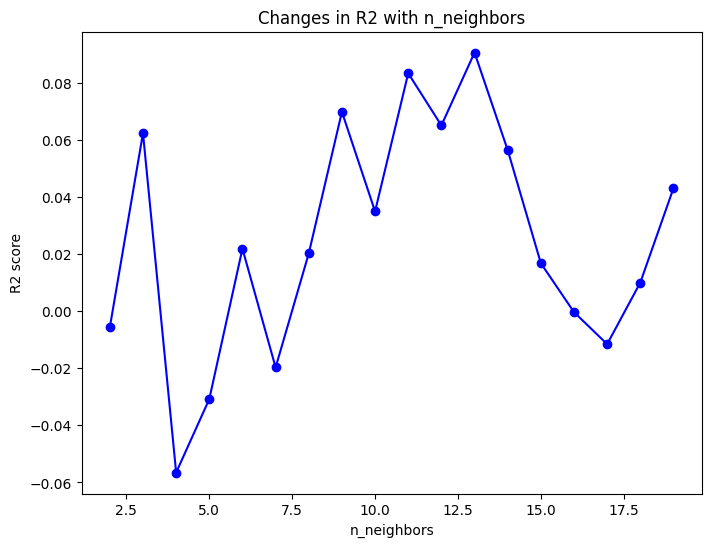

In [29]:
# Plotting the changes in R2 with n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), r2_scores, marker='o', linestyle='-', color='blue')
plt.title('Changes in R2 with n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('R2 score')
plt.show()